In [18]:
# Using pandas to process data
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr

from utils.data_util import parse_bj_aq_data, generate_model_data
# from utils.plot_util import plot_station, plot_stations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 数据解析

In [2]:
bj_aq_data, stations, bj_aq_stations, bj_aq_stations_merged = parse_bj_aq_data()

NaN in PM2.5 is 23459, 6.508615 %
NaN in PM10 is 96175, 26.683406 %
NaN in NO2 is 21720, 6.026135 %
NaN in CO is 46144, 12.802486 %
NaN in O3 is 23732, 6.584358 %
NaN in SO2 is 21664, 6.010598 %
There are 35 air quality stations in Beijing

The stations in Beijing are:
 {'donggaocun_aq', 'daxing_aq', 'yufa_aq', 'gucheng_aq', 'wanliu_aq', 'huairou_aq', 'fengtaihuayuan_aq', 'zhiwuyuan_aq', 'tiantan_aq', 'miyunshuiku_aq', 'dongsi_aq', 'pingchang_aq', 'fangshan_aq', 'nongzhanguan_aq', 'shunyi_aq', 'yanqin_aq', 'liulihe_aq', 'yongledian_aq', 'beibuxinqu_aq', 'yungang_aq', 'yongdingmennei_aq', 'miyun_aq', 'guanyuan_aq', 'wanshouxigong_aq', 'nansanhuan_aq', 'yizhuang_aq', 'dongsihuan_aq', 'pinggu_aq', 'aotizhongxin_aq', 'qianmen_aq', 'mentougou_aq', 'dingling_aq', 'badaling_aq', 'tongzhou_aq', 'xizhimenbei_aq'}


/notebooks/KDD_Cup_2018/utils/data_util.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bj_aq_station.drop("utc_time", axis=1, inplace=True)
/notebooks/KDD_Cup_2018/utils/data_util.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bj_aq_station.drop("stationId", axis=1, inplace=True)


In [3]:
bj_aq_stations_merged.head()

,fangshan_aq_PM2.5,fangshan_aq_PM10,fangshan_aq_NO2,fangshan_aq_CO,fangshan_aq_O3,fangshan_aq_SO2,dongsihuan_aq_PM2.5,dongsihuan_aq_PM10,dongsihuan_aq_NO2,dongsihuan_aq_CO,...,xizhimenbei_aq_NO2,xizhimenbei_aq_CO,xizhimenbei_aq_O3,xizhimenbei_aq_SO2,yizhuang_aq_PM2.5,yizhuang_aq_PM10,yizhuang_aq_NO2,yizhuang_aq_CO,yizhuang_aq_O3,yizhuang_aq_SO2
format_time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 14:00:00,399.0,472.0,136.0,6.3,4.0,10.0,390.0,394.0,99.0,6.8,...,171.0,8.3,8.0,15.0,278.0,362.0,117.0,5.7,6.0,2.0
2017-01-01 15:00:00,397.0,485.0,126.0,6.4,4.0,10.0,390.0,394.0,92.0,6.6,...,161.0,0.8,8.0,15.0,298.0,382.0,117.0,5.8,6.0,3.0
2017-01-01 16:00:00,429.0,520.0,124.0,6.7,4.0,9.0,374.0,396.0,81.0,7.2,...,164.0,7.6,8.0,14.0,306.0,393.0,116.0,6.1,6.0,2.0
2017-01-01 17:00:00,441.0,505.0,127.0,6.7,4.0,10.0,401.0,419.0,71.0,7.3,...,155.0,7.8,8.0,14.0,306.0,387.0,118.0,6.3,6.0,3.0
2017-01-01 18:00:00,438.0,485.0,127.0,6.7,4.0,9.0,408.0,419.0,58.0,6.9,...,147.0,7.8,8.0,14.0,315.0,408.0,111.0,6.4,7.0,3.0


In [5]:
# 将缺失值用0补全
bj_aq_stations_merged.fillna(0, inplace=True)

# 相同特征不同站点之间的相关性

In [213]:
# 站点的具体位置
station_locations = pd.read_excel("./KDD_CUP_2018/Beijing/location/Beijing_AirQuality_Stations_locations.xlsx")
station_locations.head()

,stationName,longitude,latitude
0,dongsi_aq,116.417,39.929
1,tiantan_aq,116.407,39.886
2,guanyuan_aq,116.339,39.929
3,wanshouxigong_aq,116.352,39.878
4,aotizhongxin_aq,116.397,39.982


In [241]:
station_locations["longitude"].values.min()

115.97199999999999

In [210]:
def caculate_distance(station_1, station_2, station_locations):
    '''
    station_1, station_2 : names of two stations
    station_locations : a dataframe of "stationName", "longitude", "latitude"
    '''
    location_1 = station_locations[station_1+"_aq" == station_locations["stationName"]]
    location_2 = station_locations[station_2+"_aq" == station_locations["stationName"]]
    dis = np.sqrt((location_1["longitude"].values[0] - location_2["longitude"].values[0])**2 + 
                  (location_1["latitude"].values[0] - location_2["latitude"].values[0])**2)
    return dis

In [258]:
def caculate_r_distance_relations(dataframe, feature):
    '''
    dataframe : dataframe with all data.
    feature : feature that you want to compare.
    '''
    features = [name for name in dataframe.columns if feature in name]
    df = dataframe[features]
    
    relations = pd.DataFrame(columns=["station_1", "station_2", "r", "distance"])
    for i in range(len(features)-1):
        for j in range(i+1,len(features)):
            station_1 = features[i].split("_")[0]
            station_2 = features[j].split("_")[0]
            ts_station_1 = df[features[i]]
            ts_station_2 = df[features[j]]
            r = pearsonr(ts_station_1, ts_station_2)[0]
            distance = caculate_distance(station_1, station_2, station_locations)
            s = pd.Series({"station_1":station_1, "station_2":station_2, "r":r, "distance":distance})
            relations = relations.append(s,ignore_index=True)
    
    # 按照相关系数降序排序
    relations = relations.sort_values(by=['r'], ascending=False)

    plt.subplot(2,1,1)
    plt.plot(range(len(relations)), relations['r']);
    plt.subplot(2,1,2)
    plt.plot(range(len(relations)), relations['distance']);

    # “相关系数的降低” 与 “站点之间的距离” 存在一定的正相关关系
    # “距离” 与 “相关性” 存在负相关关系
    # print("The range of pearsonr between stations of feature %s are between %d and %d" %(feature, relations["r"].values.min(), relations["r"].values.max()))
    
    r = pearsonr(relations["r"].values, relations['distance'].values)[0]
    # print("r = ", pearsonr(relations["r"].values, relations['distance'].values)[0])
    
    return relations, r

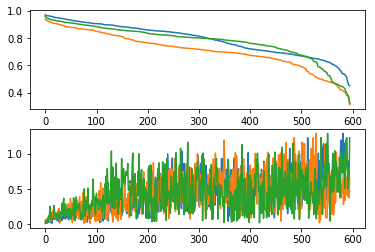

In [259]:
for feature in ["PM2.5", "PM10", "O3"]:
    relations, r = caculate_r_distance_relations(bj_aq_stations_merged, feature)

# 数据的下载补齐

- 空气质量数据
    - 10298 data for 35 stations
    - 2017:01:01 14:00 - 2018:03:31 15:00 

In [26]:
# 原有 aq 数据的范围
print(min(bj_aq_data.index), max(bj_aq_data.index))

2017-01-01 14:00:00 2018-03-31 15:00:00


In [30]:
# 新下载的 aq 数据
bj_aq_dataset_new = pd.read_csv("./KDD_CUP_2018/Beijing/aq/bj_airquality_2018-03-31-15-2018-04-15-23.csv")
bj_aq_dataset_new.head()

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,2941450,dongsi_aq,2018-03-31 07:00:00,105.0,172.0,53.0,0.8,127.0,14.0
1,2941451,tiantan_aq,2018-03-31 07:00:00,95.0,123.0,54.0,0.9,121.0,15.0
2,2941452,guanyuan_aq,2018-03-31 07:00:00,95.0,139.0,66.0,0.8,123.0,13.0
3,2941453,wanshouxigong_aq,2018-03-31 07:00:00,99.0,172.0,58.0,1.0,119.0,14.0
4,2941454,aotizhongxin_aq,2018-03-31 07:00:00,117.0,166.0,67.0,0.8,111.0,14.0


In [31]:
length = bj_aq_dataset_new.shape[0]
formet_time = pd.Series([datetime.datetime.strptime(bj_aq_dataset_new["time"][i],'%Y-%m-%d %H:%M:%S') for i in range(length)])
bj_aq_dataset_new["format_time"] = formet_time
bj_aq_dataset_new.set_index("format_time", inplace=True)

In [33]:
# 新下载的 aq 数据的范围
print(min(bj_aq_dataset_new.index), max(bj_aq_dataset_new.index))

2018-03-31 07:00:00 2018-04-15 23:00:00


# ChangeLog
- 0419 对新下载的数据进行了数据探索
- TODO
    - 新下载的数据和之前的数据在时间轴上有重叠的部分，同时原始的数据有很大部分的缺失，可以使用新下载的数据对原始数据进行补齐
    - 分析之前的数据中，不同站点的时间轴缺失情况是怎么样的，如果有大段的缺失，建议丢弃该片段
        - 对于短期的 + 个别的缺失，使用插值的方式进行补全
        - 对于长期的 + 全特征的缺失，将对应的数据删除